In [357]:
#importing the libraries
import pickle
from itertools import chain
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import requests
import json
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier




LOADING PREPROCESSED TEXT


In [221]:
pickle_file_path = 'saved_spell_corrected_data_dictionary.pkl'

# Load the pickle file
with open(pickle_file_path, 'rb') as file:
    data_dict = pickle.load(file)

Here now we have the data in form of dictionary where key is tag and values are list of texts


In [222]:
# Flatten the dictionary into lists of tags and texts
tags = list(chain.from_iterable([[tag]*len(texts) for tag, texts in data_dict.items()]))
texts = list(chain.from_iterable([texts for texts in data_dict.values()]))

In [223]:
df = pd.DataFrame(list(zip(tags,texts)), columns=["tags","texts"])

In [225]:
df["tags"].unique()

array(['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT'],
      dtype=object)

In [226]:
df["texts"][1]

'texas american title company west loop south suite houston borrowers closing statement date new loans noble mortgage investments borrower team properties houston property north hill spring blk enchanted oaks sec credits description amount new loan principal loan amount noble mortgage investments total credits charges description amount purchase price contract sales price portions other debuts all taxes hour additional charges rollback repairs noble mortgage investments new loan fees loan originating fee noble mortgage investments appraisal fee bryan lever document preparation adam bing processing fee noble mortgage investments flood cert fee noble mortgage investments homeowners insurance months maxim insurance flood ins premium months maxim insurance poc title charges lenders coverage texas american title company pattern law firm endorsement texas american title company pattern law firm escort fee pattern law firm electronic delivery handling fee recording pattern law firm guarantee 

In [227]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [228]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [229]:
def tokenize_and_lemmatize(text):
    # Tokenize text into words
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens with POS tagging
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower(), get_wordnet_pos(tag)) for token, tag in pos_tags if token.isalpha()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    lemmatized_tokens = [token for token in lemmatized_tokens if token not in stop_words and token not in string.punctuation]
    
    return lemmatized_tokens

In [230]:
df["texts"] = df["texts"].apply(tokenize_and_lemmatize)

We have applied pos_tag before lemmetization to get more accurate and proper lemmetized texts


In [317]:
df["texts"]

0       [old, republic, title, company, member, old, r...
1       [texas, american, title, company, west, loop, ...
2       [texas, american, title, company, west, loop, ...
3       [settlement, statement, omb, approval, optiona...
4       [omb, approval, final, settlement, statement, ...
                              ...                        
5226    [dotloop, signature, verification, dtlpuskufrp...
5227    [dotloop, signature, verification, dip, extens...
5228    [contract, purchase, real, estate, goldstein, ...
5229    [focus, envelope, purchase, sale, agreement, j...
5230    [jakubowski, robertson, maffei, goldsmith, tar...
Name: texts, Length: 5231, dtype: object

In [232]:
#checking the proportion of each tag in the data
tag_counts = df["tags"].value_counts()

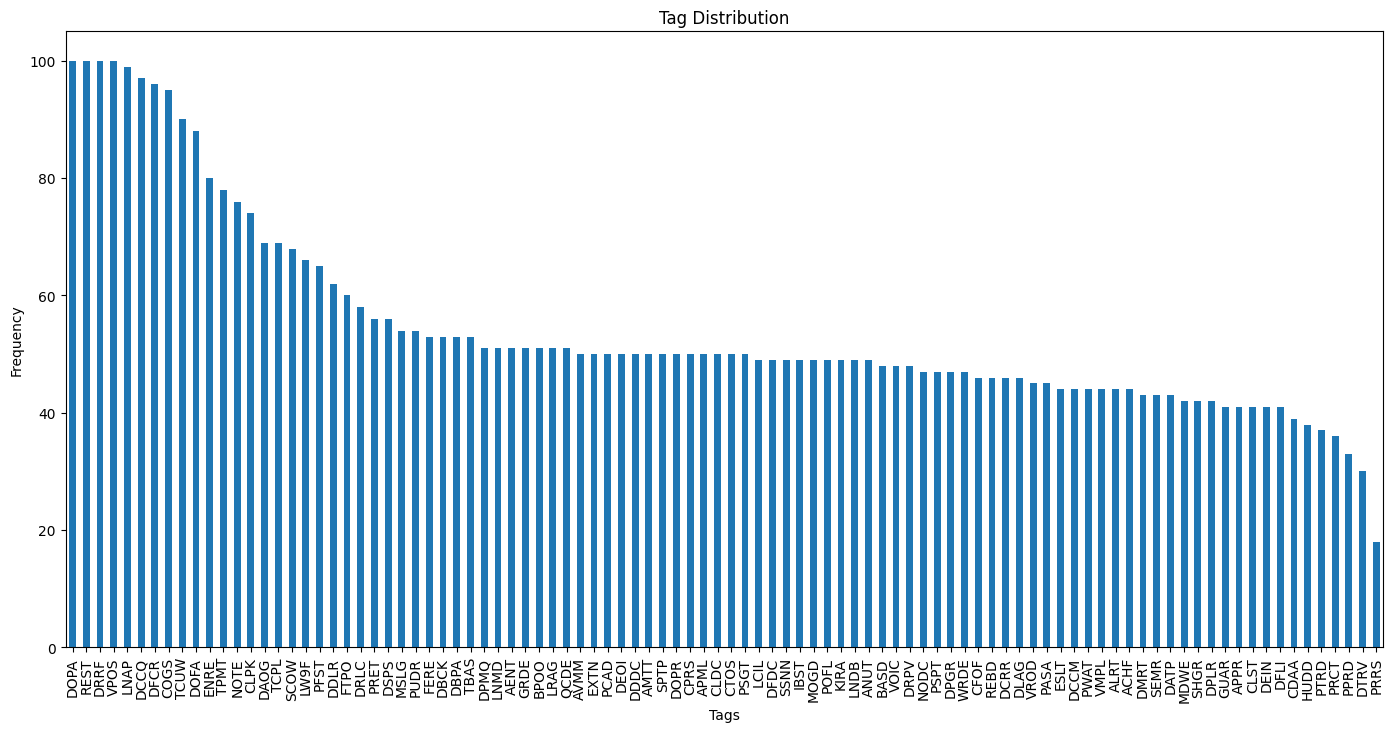

In [233]:
# Plot the distribution
plt.figure(figsize=(17, 8))
tag_counts.plot(kind='bar')
plt.title('Tag Distribution')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()


we have imbalance data so now we will apply some balancing techniques over it , mainly the oversampling technique


In [234]:
#divide the data in to X and Y 
# Assuming 'X' contains all feature columns and 'tags' that is the Y is the target column
X = df["texts"].apply(lambda x: ' '.join(x))
y = df['tags']

In [322]:
X

0       old republic title company member old republic...
1       texas american title company west loop south s...
2       texas american title company west loop south s...
3       settlement statement omb approval optional for...
4       omb approval final settlement statement servic...
                              ...                        
5226    dotloop signature verification dtlpuskufrpiwo ...
5227    dotloop signature verification dip extension a...
5228    contract purchase real estate goldstein group ...
5229    focus envelope purchase sale agreement joint e...
5230    jakubowski robertson maffei goldsmith tartagli...
Name: texts, Length: 5231, dtype: object

Convert the text to numerical representation for machine learning algo to process


In [235]:
# Step 1: Vectorize the text data (X) using TF-IDF
tfidfconverter = TfidfVectorizer(max_features=1000)
X_vectorized = tfidfconverter.fit_transform(X).toarray() 

# Step 2: Encode the labels (y) using LabelEncoder
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)

# Step 3: Check shapes to diagnose any issues
print("Shape of X_vectorized:", X_vectorized.shape)
print("Shape of y_encoded:", y_encoded.shape)

# Step 4: Ensure consistency using check_X_y (optional, but good practice)
X_vectorized, y_encoded = check_X_y(X_vectorized, y_encoded)


Shape of X_vectorized: (5231, 1000)
Shape of y_encoded: (5231,)


In [236]:
# Saving the vectorizer to disk
joblib.dump(tfidfconverter, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [237]:
# Using Smote for upsampling the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_vectorized, y_encoded)

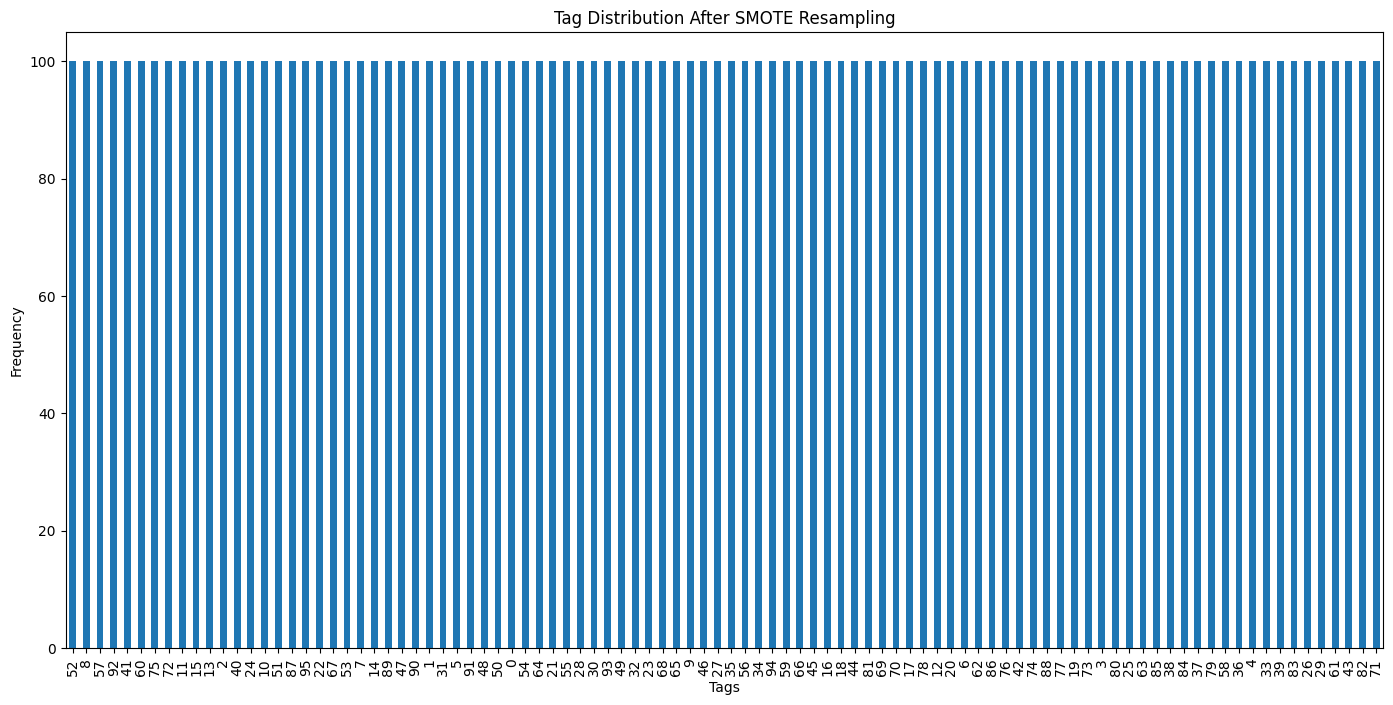

In [238]:
# Count the occurrences of each tag in the resampled dataset
tag_counts_resampled = pd.Series(y_train_resampled).value_counts()

# Plot the distribution
plt.figure(figsize=(17, 8))
tag_counts_resampled.plot(kind='bar')
plt.title('Tag Distribution After SMOTE Resampling')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()


In [239]:
#Split the balanced data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

Random Forests


Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       1.00      1.00      1.00        21
        PSGT       0.93      0.93      0.93        15
        DRRF       0.94      1.00      0.97        17
        PTRD       0.75      0.80      0.77        15
        SSNN       0.95      1.00      0.98        20
        MOGD       1.00      1.00      1.00        18
        APPR       1.00      1.00      1.00        20
        DBCK       1.00      0.93      0.96        14
        CLDC       1.00      1.00      1.00        21
        PWAT       0.96      1.00      0.98        24
        PPRD       1.00      0.96      0.98        23
        DOFA       1.00      1.00      1.00        20
        POFL       0.89      0.94      0.91        17
        REST       1.00      1.00      1.00        15
        DTRV       0.95      0.95      0.95        20
        DAOG       0.95      1.00      0.97        1

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\3092329560.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\3092329560.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


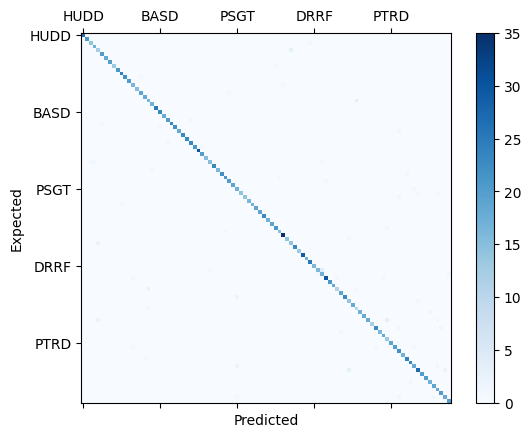

In [240]:
classifier = RandomForestClassifier(n_estimators=1200, random_state=1)  #defining 1000 nodes
rf = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
     

my_tags = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=my_tags))
#print(confusion_matrix(y_test,y_pred))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [241]:
# Saving model to disk
pickle.dump(rf, open('rfmodel.pkl','wb'))

Naive Bayes


Accuracy: 0.8973958333333333
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       0.90      0.86      0.88        21
        PSGT       1.00      0.40      0.57        15
        DRRF       0.74      1.00      0.85        17
        PTRD       0.73      0.73      0.73        15
        SSNN       0.91      1.00      0.95        20
        MOGD       0.94      0.94      0.94        18
        APPR       1.00      1.00      1.00        20
        DBCK       0.62      0.93      0.74        14
        CLDC       1.00      1.00      1.00        21
        PWAT       0.92      1.00      0.96        24
        PPRD       1.00      1.00      1.00        23
        DOFA       1.00      1.00      1.00        20
        POFL       1.00      0.88      0.94        17
        REST       0.92      0.80      0.86        15
        DTRV       0.89      0.80      0.84        20
        DAOG       1.00      1.00      1.00        1

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\523627281.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\523627281.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


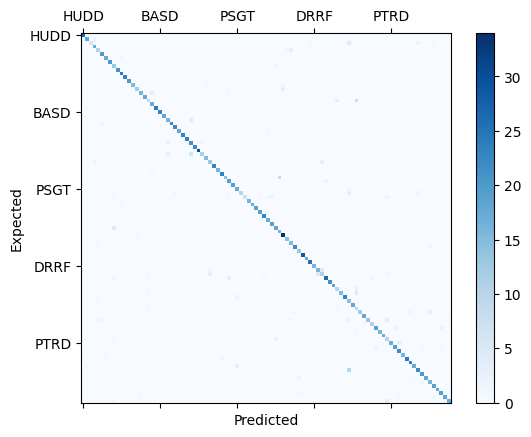

In [261]:
clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [302]:
# Saving model to disk
pickle.dump(clf, open('naivemodel.pkl','wb'))

XGBoost


Accuracy: 0.9348958333333334
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       1.00      1.00      1.00        21
        PSGT       0.94      1.00      0.97        15
        DRRF       0.85      1.00      0.92        17
        PTRD       0.87      0.87      0.87        15
        SSNN       0.95      1.00      0.98        20
        MOGD       0.95      1.00      0.97        18
        APPR       0.91      1.00      0.95        20
        DBCK       0.93      0.93      0.93        14
        CLDC       0.95      1.00      0.98        21
        PWAT       0.96      0.96      0.96        24
        PPRD       1.00      0.96      0.98        23
        DOFA       0.95      1.00      0.98        20
        POFL       0.94      0.88      0.91        17
        REST       0.88      1.00      0.94        15
        DTRV       1.00      0.90      0.95        20
        DAOG       0.94      0.89      0.91        1

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\839389655.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\839389655.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


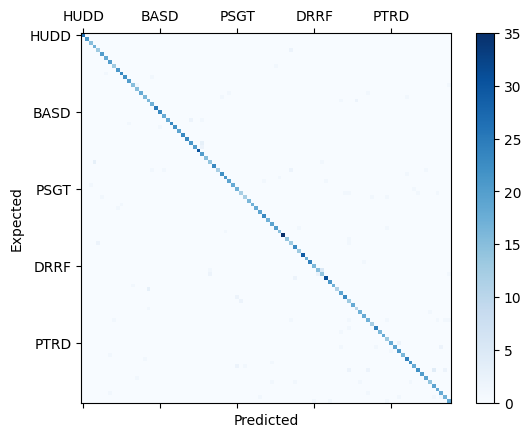

In [243]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [263]:
pickle.dump(xgb, open('xgbmodel.pkl','wb'))

Lets try the model


In [4]:
!pip install pypickle


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [5]:
import pickle

In [7]:
# rfmodel = pickle.load(open('rfmodel.pkl','rb'))
xgbmodel = pickle.load(open('xgbmodel.pkl','rb'))
naivemodel = pickle.load(open('naivemodel.pkl','rb'))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.5.1 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [344]:
test_data = "help contact welcome back riot kashmir login settings preferences manage pin massmutual dashboard logo dashboard putting money rolling moving money around balance transfers investment selection taking money out loans everything else form account balances account summary benefit estimates calculators forms investment performance research pending transactions personal info plan highlights statement account statementsrequired disclosures testing schedule account statement account gain capital holdings inc plan statement account available period one year length the statement period must fall within two year period ending beginning date yyyy ending date yyyy change statement account period account summary investment summary source summary loan summary beginning balance contributions distributions activity investment income ending balance your account rate return period this estimated dollarweighted rate return based cash flow account the calculation assumes evenly distributed cash flow throughout applicable period your return could distorted nonperiodic transactions may differ investment option performance level timing cash flows past performance guarantee future results this statement displays activity account business days period select activity posted close business reflected statement following business day balances subject plans testing requirements your current vested balance displayed account balances page please refer statement account plan participate information may applicable benefit plans investment direction provisions asset diversification social security integration massmutual massachusetts mutual life insurance company massmutual springfield all rights reserved stay connected twitter facebook youtube linkedin site map privacy terms use account protection policy"

In [345]:
test_data = tokenize_and_lemmatize(test_data)

In [346]:
tfidfconverter = joblib.load('tfidf_vectorizer.pkl')
test_data = tfidfconverter.transform([test_data]).toarray() 

In [347]:
inputs = test_data

In [348]:
output_category = rfmodel.predict(inputs)
output_category = (labelencoder.inverse_transform((output_category)))
output_category

'SSNN'

In [340]:
output_category = xgbmodel.predict(inputs)
output_category = (labelencoder.inverse_transform((output_category)))
output_category[0]

'SCOW'

In [350]:
output_category = naivemodel.predict(inputs)
output_category = (labelencoder.inverse_transform((output_category)))
output_category[0]

'PRCT'

Accuracy: 0.9192708333333334
Classification Report:
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       0.91      1.00      0.95        21
        PSGT       1.00      0.67      0.80        15
        DRRF       0.89      1.00      0.94        17
        PTRD       0.86      0.80      0.83        15
        SSNN       0.91      1.00      0.95        20
        MOGD       1.00      0.94      0.97        18
        APPR       1.00      1.00      1.00        20
        DBCK       0.74      1.00      0.85        14
        CLDC       1.00      1.00      1.00        21
        PWAT       0.92      1.00      0.96        24
        PPRD       1.00      0.96      0.98        23
        DOFA       1.00      1.00      1.00        20
        POFL       1.00      0.94      0.97        17
        REST       1.00      0.80      0.89        15
        DTRV       0.86      0.95      0.90        20
        DAOG       1.00      

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\1093011093.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=90)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\1093011093.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


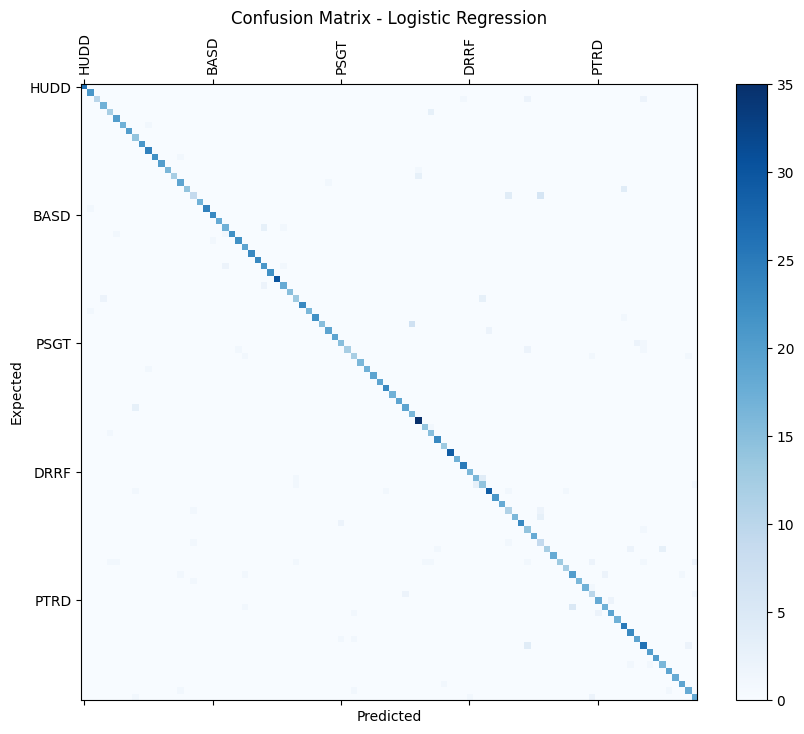

In [305]:
labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
model = logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

# Plot confusion matrix
labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=90)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [308]:
pickle.dump(model, open('logmodel.pkl','wb'))

In [309]:
logisticmodel = pickle.load(open('logmodel.pkl','rb'))

In [351]:
output_category = logisticmodel.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category[0]

'DRRF'

Accuracy: 0.9390625
Classification Report:
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       1.00      1.00      1.00        21
        PSGT       1.00      0.67      0.80        15
        DRRF       0.89      1.00      0.94        17
        PTRD       0.87      0.87      0.87        15
        SSNN       0.91      1.00      0.95        20
        MOGD       1.00      1.00      1.00        18
        APPR       1.00      1.00      1.00        20
        DBCK       0.88      1.00      0.93        14
        CLDC       1.00      1.00      1.00        21
        PWAT       0.96      1.00      0.98        24
        PPRD       1.00      0.96      0.98        23
        DOFA       1.00      1.00      1.00        20
        POFL       1.00      0.94      0.97        17
        REST       0.92      0.80      0.86        15
        DTRV       0.95      0.95      0.95        20
        DAOG       1.00      1.00     

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\185887344.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=90)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\185887344.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


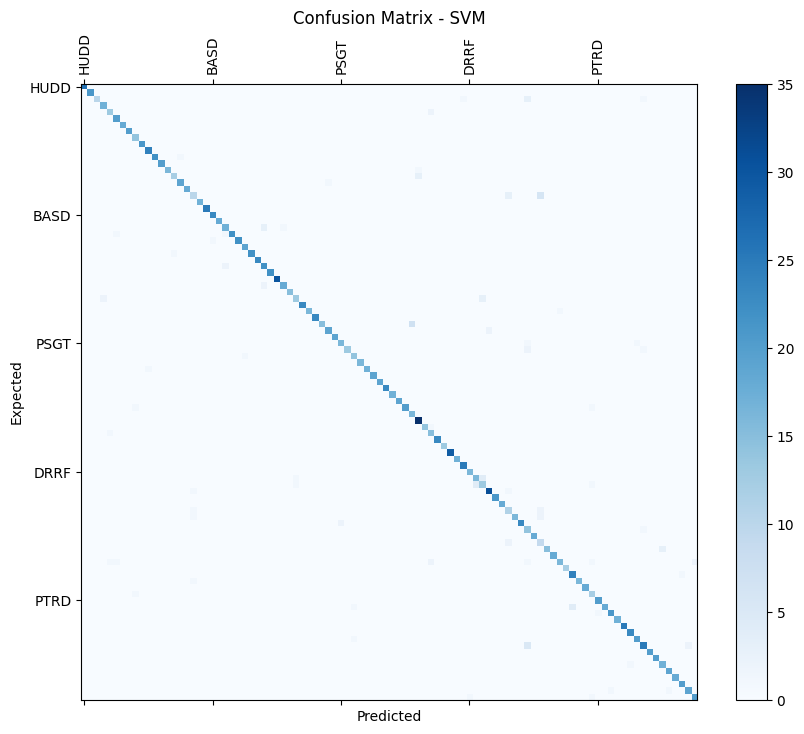

In [312]:
labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']



# Initialize SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
model = svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

# Plot confusion matrix
labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=90)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix - SVM')
plt.show()


In [313]:
pickle.dump(model, open('svmmodel.pkl','wb'))

In [314]:
svmmodel = pickle.load(open('svmmodel.pkl','rb'))

In [352]:
output_category = svmmodel.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category[0]

'PSGT'

Accuracy: 0.9359375
Classification Report:
              precision    recall  f1-score   support

        HUDD       1.00      1.00      1.00        26
        BASD       1.00      1.00      1.00        21
        PSGT       1.00      0.73      0.85        15
        DRRF       0.89      1.00      0.94        17
        PTRD       0.86      0.80      0.83        15
        SSNN       0.91      1.00      0.95        20
        MOGD       1.00      1.00      1.00        18
        APPR       1.00      1.00      1.00        20
        DBCK       0.82      1.00      0.90        14
        CLDC       1.00      1.00      1.00        21
        PWAT       0.96      1.00      0.98        24
        PPRD       1.00      1.00      1.00        23
        DOFA       1.00      1.00      1.00        20
        POFL       1.00      0.94      0.97        17
        REST       1.00      0.80      0.89        15
        DTRV       1.00      0.95      0.97        20
        DAOG       1.00      1.00     

C:\Users\parya\AppData\Local\Temp\ipykernel_34892\3458102567.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=90)
C:\Users\parya\AppData\Local\Temp\ipykernel_34892\3458102567.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


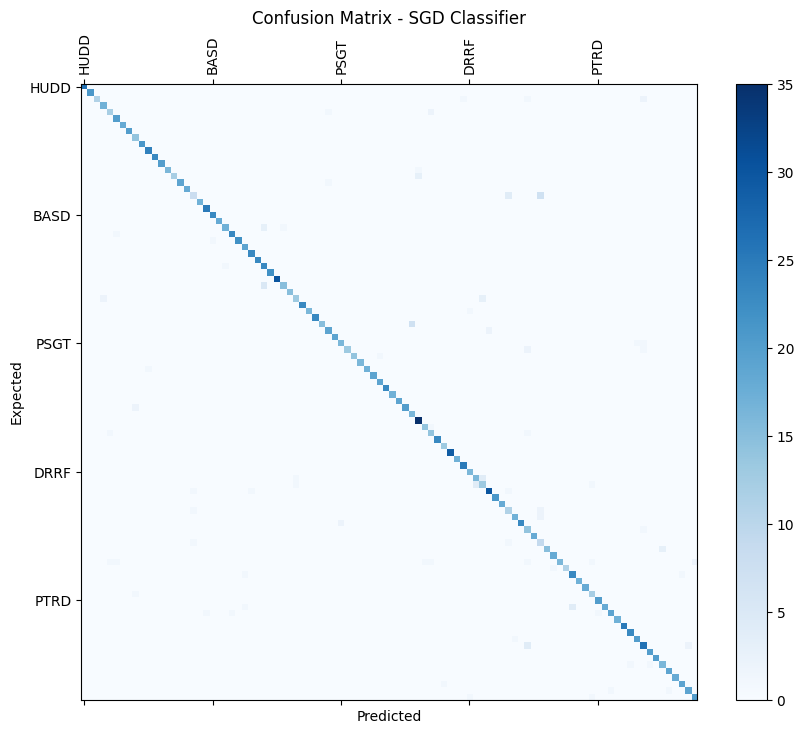

In [323]:
labels = ['HUDD', 'BASD', 'PSGT', 'DRRF', 'PTRD', 'SSNN', 'MOGD', 'APPR',
       'DBCK', 'CLDC', 'PWAT', 'PPRD', 'DOFA', 'POFL', 'REST', 'DTRV',
       'DAOG', 'CPRS', 'ENRE', 'PASA', 'LRAG', 'VROD', 'TCPL', 'CTOS',
       'PUDR', 'DOPR', 'SCOW', 'DSPS', 'MDWE', 'DFCR', 'DDLR', 'SEMR',
       'DPMQ', 'DMRT', 'ANUT', 'LNMD', 'PRRS', 'QCDE', 'DPGR', 'SHGR',
       'DPLR', 'SPTP', 'MSLG', 'DDDC', 'REBD', 'AMTT', 'DATP', 'LNAP',
       'DOPA', 'DEIN', 'CLST', 'AVMM', 'IBST', 'PCAD', 'DCCM', 'WRDE',
       'TBAS', 'GUAR', 'CDAA', 'DCRR', 'DRLC', 'ALRT', 'CLPK', 'COGS',
       'CFOF', 'PRET', 'PSPT', 'LW9F', 'DRPV', 'VOIC', 'LNDB', 'TCUW',
       'EXTN', 'TPMT', 'DEOI', 'ESLT', 'BPOO', 'NOTE', 'PFST', 'DCCQ',
       'DLAG', 'FTPO', 'VPOS', 'DFDC', 'LCIL', 'AENT', 'DBPA', 'NODC',
       'KIRA', 'ACHF', 'GRDE', 'FERE', 'VMPL', 'APML', 'DFLI', 'PRCT']

# Initialize SGD Classifier
sgd_model = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, tol=1e-3)

# Train the model
model = sgd_model.fit(X_train, y_train)

# Predict on the test set
y_pred = sgd_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=my_tags))

# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

# Plot confusion matrix
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=90)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix - SGD Classifier')
plt.show()


In [324]:
pickle.dump(model, open('sgdmodel.pkl','wb'))

In [325]:
sgdmodel = pickle.load(open('sgdmodel.pkl','rb'))

In [353]:
output_category = sgdmodel.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category[0]

'DFCR'